# Spotify Challenge - Clustering songs- Unsupervised Learning

🎯 The goal of this recap is to **cluster songs** using the **KMeans _(clustering algorithm)_** with a **PCA _(dimensionality reduction)_**

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution, 
# to see whether your sample is normally distributed or not

## (1) The Spotify Dataset

In [ ]:
from sklearn.utils import shuffle

spotify = shuffle(pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv'))
spotify.head()

### (1.1) Basic Info

In [ ]:
spotify.info()

### (1.2) Working on the numerical features

🔢  Let's focus on the numerical features:

In [ ]:
spotify_num = spotify.select_dtypes(exclude = ['object'])
spotify_num

### (1.3) Correlations between features

፨ Visualize the correlation matrix (`PuRd` is a nice cmap choice)

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(spotify_num.corr(),
            annot = True,
            annot_kws = {"fontsize":10},
            cmap='PuRd');

### (1.4) 3D Visualisation

🎨 Let's select 3 features of these songs and visualise them in a 3D-scatter-plot `plotly`:

In [ ]:
fig = px.scatter_3d(spotify_num, 
                    x = 'danceability',
                    y = 'energy',
                    z = 'speechiness',
                    opacity=0.7, width=500, height=500
           )
fig.show()

🎯 _Remember: our goal is to cluster these songs_

## (2) Unsupervised Learning: Clustering

### (2.1) Vanilla KMeans

💫 Let's try our first _Unsupervised Algorithm_ 

❓ Fit a `kmeans_vanilla` model directly on our `spotify_num`, keeping default number of clusters
- store its predicted labels in variable `labels_vanilla`

In [ ]:
fig = px.scatter_3d(spotify_num, 
                    x = 'danceability',
                    y = 'energy',
                    z = 'speechiness',
                    color = labels_vanilla, width=500, height=500)
fig.show()

😭 It doesn't look good at all... who would pay 10-15 euros a month to Spotify, Apple Music, Deezer, Amazon Music or Tidal for that ?

### (2.2) Scaling + KMeans

🪜 Remember that the KMeans is a distance-based algorithm and that for any Machine Learning model, we should scale the features so that they start with an "equal chance" of impacting the predictions.

👇 Let's take a short approach to scaling and Robust Scale everything. 

In [ ]:
scaler = RobustScaler()
spotify_scaled = pd.DataFrame(scaler.fit_transform(spotify_num), columns=spotify_num.columns)
spotify_scaled

❓ Fit the same default KMeans model number and compare results visually

In [ ]:
# YOUR CODE HERE

In [ ]:
labels_scaled = kmeans_scaled.labels_
labels_scaled

🧪Okay, our songs'clustering look better even if we can't rival yet with the datascience team at Spotify!

In [ ]:
fig_scaled = px.scatter_3d(spotify_scaled,
                           x = 'danceability',
                           y = 'energy',
                           z = 'speechiness',
                           color = labels_scaled,
                           width=500, height=500)
fig_scaled.show()

🤪 It is a bit better but still messy...besides, we are only looking at one specific a 3D slice of our dataset here!

### (2.3) Scaling + PCA + KMeans

🧑🏻‍🏫 What if we perform a PCA before running our clustering algorithm ? We could:
* reduce dimensionality to get better visual feedback on our clustering
* use the orthogonality of the principal components so that the KMeans algorithm increases its clustering power

❓ Fit a PCA and reduce dimension appropriately using the elbow method

In [ ]:
# YOUR CODE HERE

❓ Project your $ 10000 \times 10$ `spotify_num_scaled` dataset into this new space with the number of principal components you decided to keep. Name it `spotify_proj`

In [ ]:
# YOUR CODE HERE

In [ ]:
fig_scaled = px.scatter_3d(spotify_proj, x = 0, y = 1, z = 2, opacity=0.7, width=500, height=500)
fig_scaled.show()

❓ Let's try a KMeans now

In [ ]:
# YOUR CODE HERE

In [ ]:
fig_scaled = px.scatter_3d(spotify_proj,
                           x = 0, 
                           y = 1,
                           z = 2,
                           color = labels_kmeans_pca,
                          width=500, height=500)
fig_scaled.show()

### (2.4) Ideal number of clusters ? 

<details>
    <summary><i>Are there some number of clusters useless to try ? </i></summary>

* $K = 1$ means that you would have only 1 cluster with the whole dataset of $10000$ songs
* $K = 10000$ means that each of the $10000$ songs would be its own cluster!
* $K = 2$ means that you would have only 2 clusters with $5000$ songs each...
    
        
</details>        

In [ ]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

❓ How would you decide on the number of cluster to use ?

<details>
    <summary markdown='span'>Answer</summary>

Compare each model's inertia:
    
= sum of squared distances of each observations to their closest centroids  
= sum of within-cluster sum of squares (WCSS)
</details>

In [ ]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(spotify_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

In [ ]:
elbow_highlight = 4
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

### (2.5) YellowBricks and Elbow Method

📚 There is a nice ***Data Visualisation*** library dedicated to Machine Learning algorithms which is called [**`YellowBricks`**].

⚙️ Install the library

In [ ]:
# !pip install yellowbrick

In [ ]:
# !pip install --upgrade yellowbrick

Try to find the Elbow of the KMeans algorithm on Spotify using the ***KElbowVisualizer***

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeans = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans, n_clusters = (1,21))
elbow_visualizer.fit(spotify_proj)
elbow_visualizer.show();

👉 This `KElbowVisualizer` was able to detect the elbow at $ K = 4 $ 

### (2.6) Spotify : 4 daily mixes

In [ ]:
spotify_clusters = 4

print('Working with ' + str(spotify_clusters) + ' clusters as in Spotify', flush=True)
print("-"*80)

kmeans = KMeans(n_clusters = spotify_clusters, max_iter = 300)

kmeans.fit(spotify_proj)

labelling = kmeans.labels_

fig_scaled = px.scatter_3d(spotify_proj,
                           x = 0,
                           y = 1,
                           z = 2,
                           color=labelling, width=500, height=500)
fig_scaled.show()

In [ ]:
spotify_labelled = pd.concat([spotify,pd.Series(labelling)],axis=1).rename(columns={0:"label"})
spotify_labelled

In [ ]:
np.unique(labelling)

In [ ]:
spotify_labelled.label.value_counts()

In [ ]:
daily_mixes = {}

for numero_cluster in np.unique(labelling):
    daily_mixes[numero_cluster] = spotify_labelled[spotify_labelled.label == numero_cluster]

In [ ]:
for key,value in daily_mixes.items():
    print("-"*100)
    print(f"Here are some songs for the playlist number {key}")
    print("-"*100)
    display(value.sample(20))

### (2.7) Pipeling the labelling process

❓ Wrap the scaling, pca and kmeans in one pipeline called `pipeline_spotify`

In [ ]:
# YOUR CODE HERE

In [ ]:
fig_scaled = px.scatter_3d(spotify_proj,
                           x = 0, 
                           y = 1,
                           z = 2,
                           color = labels)
fig_scaled.show()

## (4) Tensorflow Projector 

You can use [projector.tensorflow.org](https://projector.tensorflow.org/) to visualize your data in nicer 3D plots
It also allows you to try several other clustering techniques, such as
- PCA
- T-SNE
- UMAP

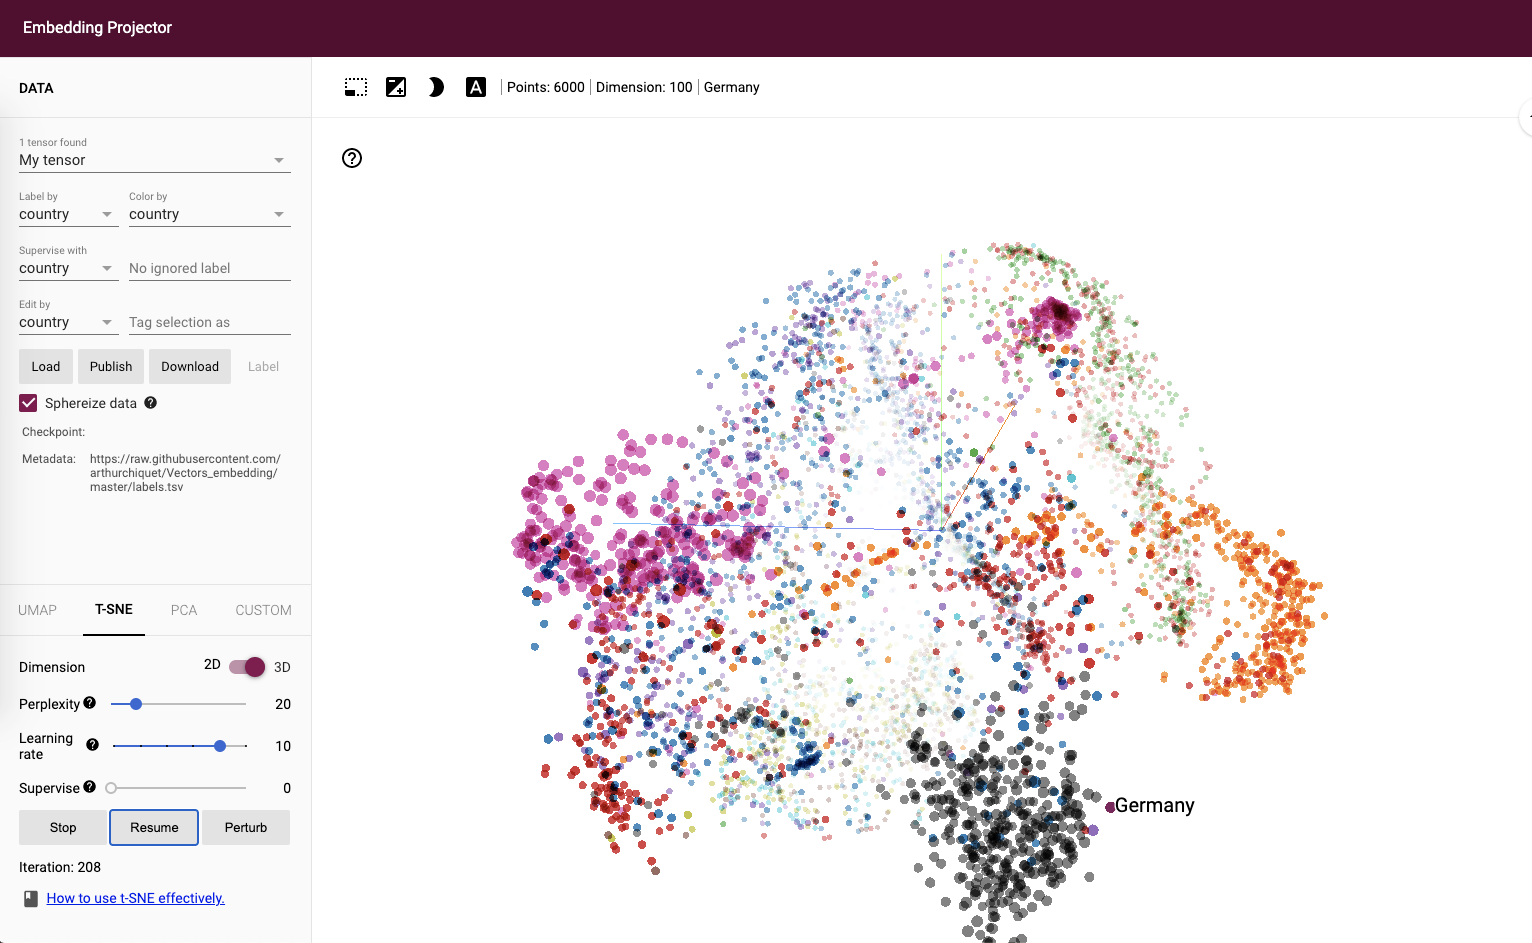

In [ ]:
# To upload data, convert them first as tsv format, then click on "load" directly from the website
spotify_scaled.head(3000).to_csv('spotify.csv', index=False, header=False, sep='\t')
pd.DataFrame(labels).head(3000).to_csv('our_labels.csv', index=False, header=False, sep='\t')

❓ Upload your spotify dataset and vizualize the **PCA** and the **UMAP** version. 
- Also upload your "custom labels" determined previously, and "color by labels".
- Does your "labels" made from PCA look interesting in the UMAP too ?

## (3) (Optional) Bibliography

Theoretical explanations of these best 2D/3D dimensionality reduction techniques
- 📺 [T-SNE: clearly explained (StatsQuest)](https://www.youtube.com/watch?v=NEaUSP4YerM&t=14s)
- 📺 [UMAP: clearly explained (StatsQuest)](https://www.youtube.com/watch?v=eN0wFzBA4Sc)

Spotify resources for projects
- 📺 [Audio Analysis theory with the Spotify Web API](https://www.youtube.com/watch?v=goUzHd7cTuA)
- 🤖 Spotify API [docs](https://developer.spotify.com/documentation/web-api/)
- 🤖 Spotify API Wrappers [Tekore](https://github.com/felix-hilden/tekore) and [Spotipy](https://github.com/plamere/spotipy)